## Experiment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json

In [2]:
results_df=pd.read_csv('qvit_mnist_results.csv')
results_df

,step,train_cost,train_acc,test_cost,test_acc,test_precision_macro,test_recall_macro,test_f1_macro,test_top1_error,test_top5_error,n_train,batch_size,repetition
0,1,2.053159,0.277734,1.665373,0.4200,0.500566,0.423795,0.359485,0.5800,0.0850,1000,64,1
1,2,1.553490,0.463086,1.281305,0.5950,0.607467,0.581795,0.560509,0.4050,0.0500,1000,64,1
2,3,1.361322,0.550195,1.152160,0.6450,0.656504,0.630085,0.614871,0.3550,0.0350,1000,64,1
3,4,1.221015,0.595703,1.039087,0.6550,0.685212,0.638591,0.625740,0.3450,0.0400,1000,64,1
4,5,1.096767,0.638672,0.949829,0.7000,0.730161,0.688335,0.662555,0.3000,0.0200,1000,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,96,0.125624,0.958356,0.094085,0.9680,0.967641,0.967108,0.967300,0.0320,0.0004,60000,64,1
596,97,0.127568,0.958339,0.093756,0.9681,0.967726,0.967220,0.967403,0.0319,0.0003,60000,64,1
597,98,0.127921,0.958406,0.093495,0.9682,0.967819,0.967321,0.967498,0.0318,0.0003,60000,64,1
598,99,0.124247,0.959722,0.093497,0.9683,0.967921,0.967418,0.967598,0.0317,0.0003,60000,64,1


In [3]:
df_agg = results_df.groupby(["n_train", "step"]).agg(["mean", "std"]).reset_index()
df_agg

n_train step train_cost     train_acc     test_cost     test_acc      ...  \
                       mean std      mean std      mean std     mean std  ...   
0      1000    1   2.053159 NaN  0.277734 NaN  1.665373 NaN   0.4200 NaN  ...   
1      1000    2   1.553490 NaN  0.463086 NaN  1.281305 NaN   0.5950 NaN  ...   
2      1000    3   1.361322 NaN  0.550195 NaN  1.152160 NaN   0.6450 NaN  ...   
3      1000    4   1.221015 NaN  0.595703 NaN  1.039087 NaN   0.6550 NaN  ...   
4      1000    5   1.096767 NaN  0.638672 NaN  0.949829 NaN   0.7000 NaN  ...   
..      ...  ...        ...  ..       ...  ..       ...  ..      ...  ..  ...   
595   60000   96   0.125624 NaN  0.958356 NaN  0.094085 NaN   0.9680 NaN  ...   
596   60000   97   0.127568 NaN  0.958339 NaN  0.093756 NaN   0.9681 NaN  ...   
597   60000   98   0.127921 NaN  0.958406 NaN  0.093495 NaN   0.9682 NaN  ...   
598   60000   99   0.124247 NaN  0.959722 NaN  0.093497 NaN   0.9683 NaN  ...   
599   60000  100   0.126355 NaN  0.959322 NaN  0.093497 NaN   0.9684 NaN  ...   

    test_f1_macro     test_top1_error     test_top5_error     batch_size      \
             mean std            mean std            mean std       mean std   
0        0.359485 NaN          0.5800 NaN          0.0850 NaN       64.0 NaN   
1        0.560509 NaN          0.4050 NaN          0.0500 NaN       64.0 NaN   
2        0.614871 NaN          0.3550 NaN          0.0350 NaN       64.0 NaN   
3        0.625740 NaN          0.3450 NaN          0.0400 NaN       64.0 NaN   
4        0.662555 NaN          0.3000 NaN          0.0200 NaN       64.0 NaN   
..            ...  ..             ...  ..             ...  ..        ...  ..   
595      0.967300 NaN          0.0320 NaN          0.0004 NaN       64.0 NaN   
596      0.967403 NaN          0.0319 NaN          0.0003 NaN       64.0 NaN   
597      0.967498 NaN          0.0318 NaN          0.0003 NaN       64.0 NaN   
598      0.967598 NaN          0.0317 NaN          0.0003 NaN       64.0 NaN   
599      0.967702 NaN          0.0316 NaN          0.0003 NaN       64.0 NaN   

    repetition      
          mean std  
0          1.0 NaN  
1          1.0 NaN  
2          1.0 NaN  
3          1.0 NaN  
4          1.0 NaN  
..         ...  ..  
595        1.0 NaN  
596        1.0 NaN  
597        1.0 NaN  
598        1.0 NaN  
599        1.0 NaN  

[600 rows x 24 columns]

Generalization errors: [-0.05613294354056653, -0.042701040045831085, -0.04751052752629081, -0.047840268661748286, -0.025000415108387214, -0.03285828951972039]


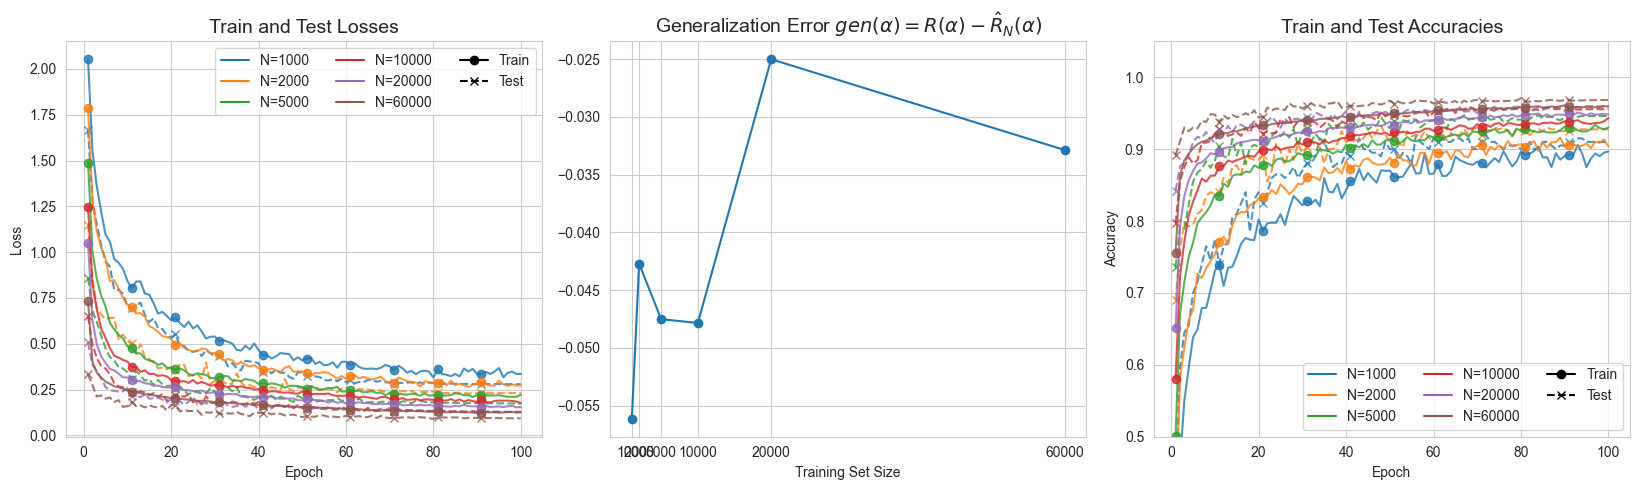

In [4]:
train_sizes=[1000,2000,5000,10000,20000,60000]

# Plotting
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, n_train in enumerate(train_sizes):
    df = df_agg[df_agg.n_train == n_train]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={n_train}$", None, fr"$N={n_train}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print("Generalization errors:", generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(train_sizes, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(train_sizes)
axes[1].set_xticklabels(train_sizes)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'N={n}', color=colors[i]) for i, n in enumerate(train_sizes)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()

## Adversarial Robustness

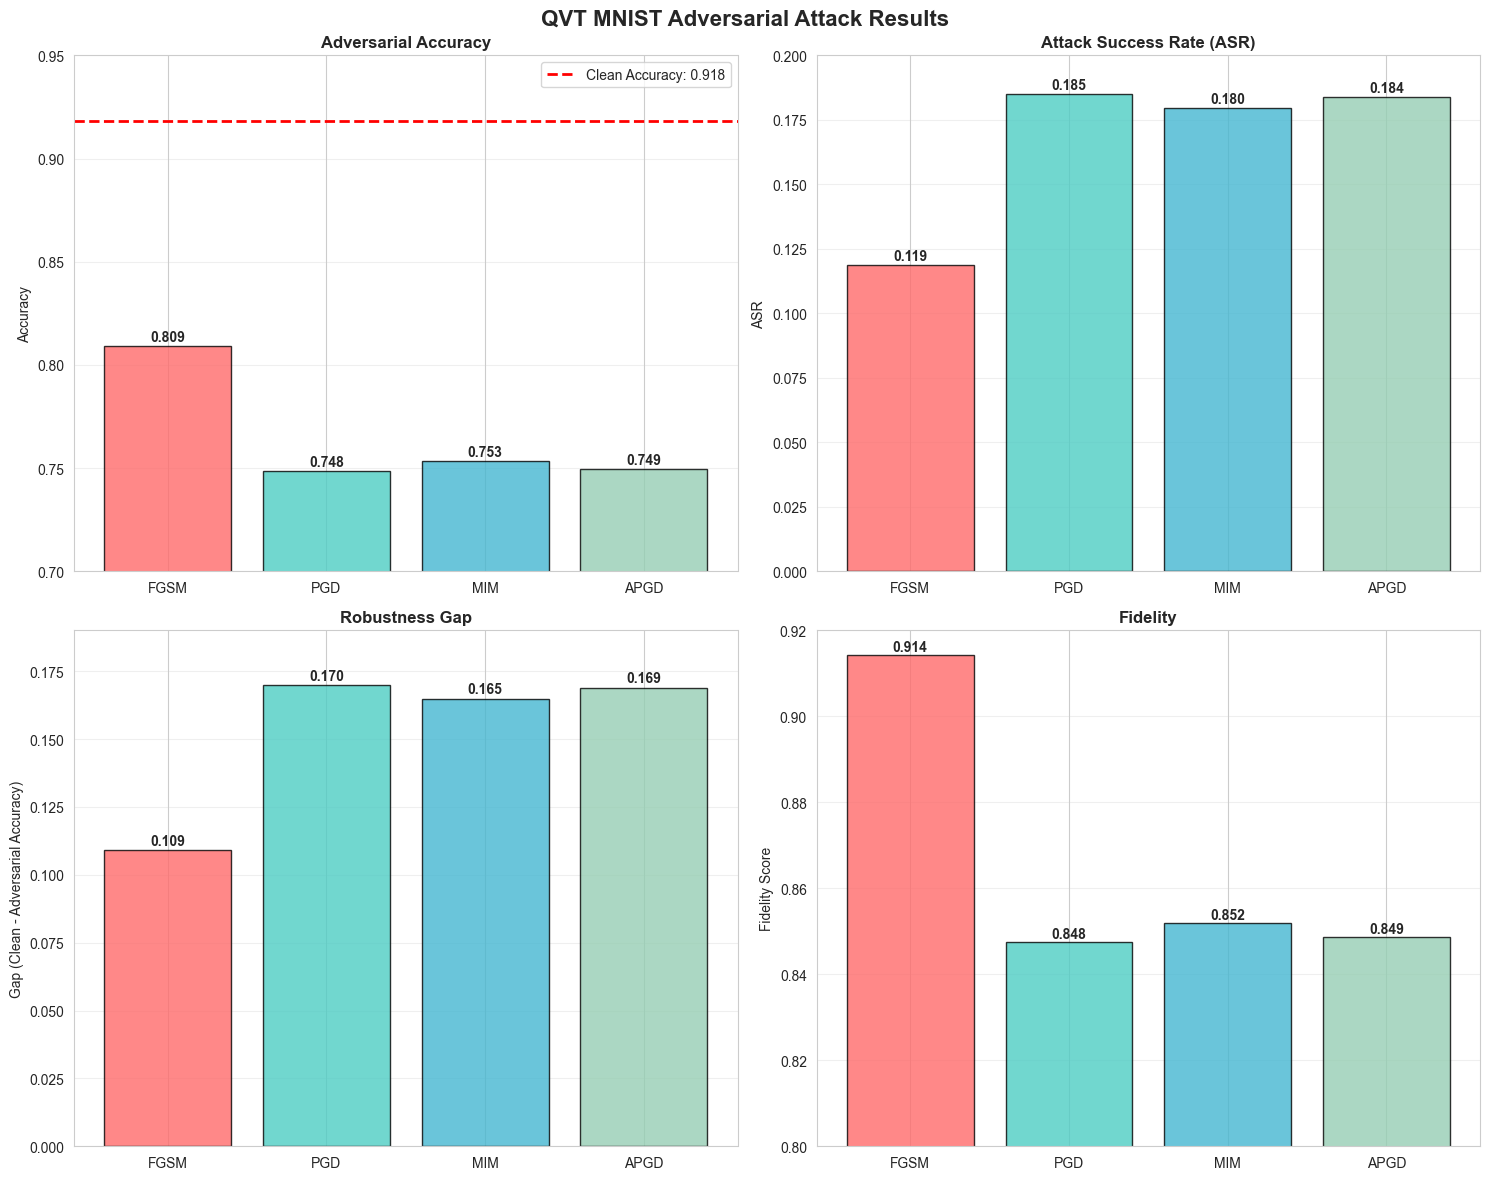

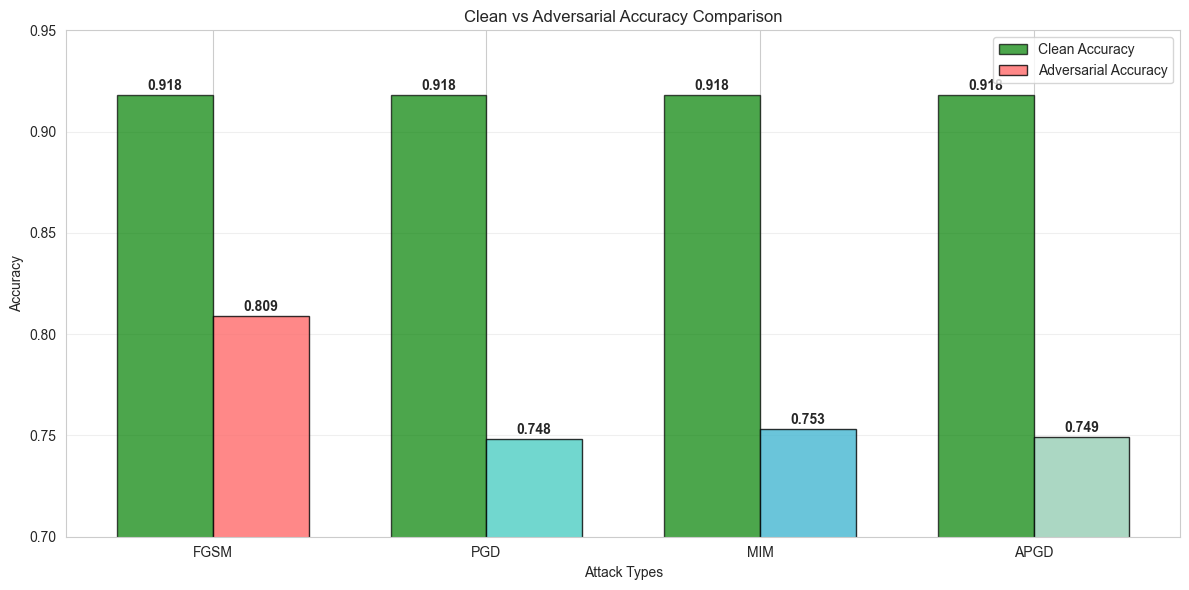


ADVERSARIAL ATTACK RESULTS SUMMARY
Clean Accuracy: 0.9182
Best Adversarial Accuracy: 0.8092 (FGSM)
Worst Adversarial Accuracy: 0.7484 (PGD)
Highest ASR: 0.1849 (PGD)
Lowest ASR: 0.1187 (FGSM)
Average Fidelity: 0.8657


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('qvt_mnist_adversarial_results.csv')

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('QVT MNIST Adversarial Attack Results', fontsize=16, fontweight='bold')

# Define colors for each attack
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
attack_types = df['attack_type']

# 1. Adversarial Accuracy
axes[0, 0].bar(attack_types, df['adv_accuracy'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Adversarial Accuracy', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.7, 0.95)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['adv_accuracy']):
    axes[0, 0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Attack Success Rate (ASR)
axes[0, 1].bar(attack_types, df['asr'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Attack Success Rate (ASR)', fontweight='bold')
axes[0, 1].set_ylabel('ASR')
axes[0, 1].set_ylim(0, 0.2)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['asr']):
    axes[0, 1].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Robustness Gap
axes[1, 0].bar(attack_types, df['robustness_gap'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Robustness Gap', fontweight='bold')
axes[1, 0].set_ylabel('Gap (Clean - Adversarial Accuracy)')
axes[1, 0].set_ylim(0, 0.19)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['robustness_gap']):
    axes[1, 0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Fidelity
axes[1, 1].bar(attack_types, df['fidelity'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Fidelity', fontweight='bold')
axes[1, 1].set_ylabel('Fidelity Score')
axes[1, 1].set_ylim(0.8, 0.92)
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['fidelity']):
    axes[1, 1].text(i, v + 0.0001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Add clean accuracy reference line to adversarial accuracy plot
clean_acc = df['clean_accuracy_on_set'].iloc[0]
axes[0, 0].axhline(y=clean_acc, color='red', linestyle='--', linewidth=2, 
                   label=f'Clean Accuracy: {clean_acc:.3f}')
axes[0, 0].legend()

plt.tight_layout()
plt.savefig('mnist_adversarial.png')
plt.show()

# Additional: Comparison chart showing Clean vs Adversarial Accuracy
plt.figure(figsize=(12, 6))
x = np.arange(len(attack_types))
width = 0.35

plt.bar(x - width/2, [clean_acc] * len(attack_types), width, 
        label='Clean Accuracy', color='green', alpha=0.7, edgecolor='black')
plt.bar(x + width/2, df['adv_accuracy'], width, 
        label='Adversarial Accuracy', color=colors, alpha=0.8, edgecolor='black')

plt.xlabel('Attack Types')
plt.ylabel('Accuracy')
plt.title('Clean vs Adversarial Accuracy Comparison')
plt.xticks(x, attack_types)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0.7, 0.95)

# Add value labels
for i, v in enumerate(df['adv_accuracy']):
    plt.text(i + width/2, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
for i in range(len(attack_types)):
    plt.text(i - width/2, clean_acc + 0.001, f'{clean_acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('mnist_clean_vs_adversarial.png')
plt.show()

# Summary statistics table
print("\n" + "="*60)
print("ADVERSARIAL ATTACK RESULTS SUMMARY")
print("="*60)
print(f"Clean Accuracy: {clean_acc:.4f}")
print(f"Best Adversarial Accuracy: {df['adv_accuracy'].max():.4f} ({df.loc[df['adv_accuracy'].idxmax(), 'attack_type']})")
print(f"Worst Adversarial Accuracy: {df['adv_accuracy'].min():.4f} ({df.loc[df['adv_accuracy'].idxmin(), 'attack_type']})")
print(f"Highest ASR: {df['asr'].max():.4f} ({df.loc[df['asr'].idxmax(), 'attack_type']})")
print(f"Lowest ASR: {df['asr'].min():.4f} ({df.loc[df['asr'].idxmin(), 'attack_type']})")
print(f"Average Fidelity: {df['fidelity'].mean():.4f}")
print("="*60)

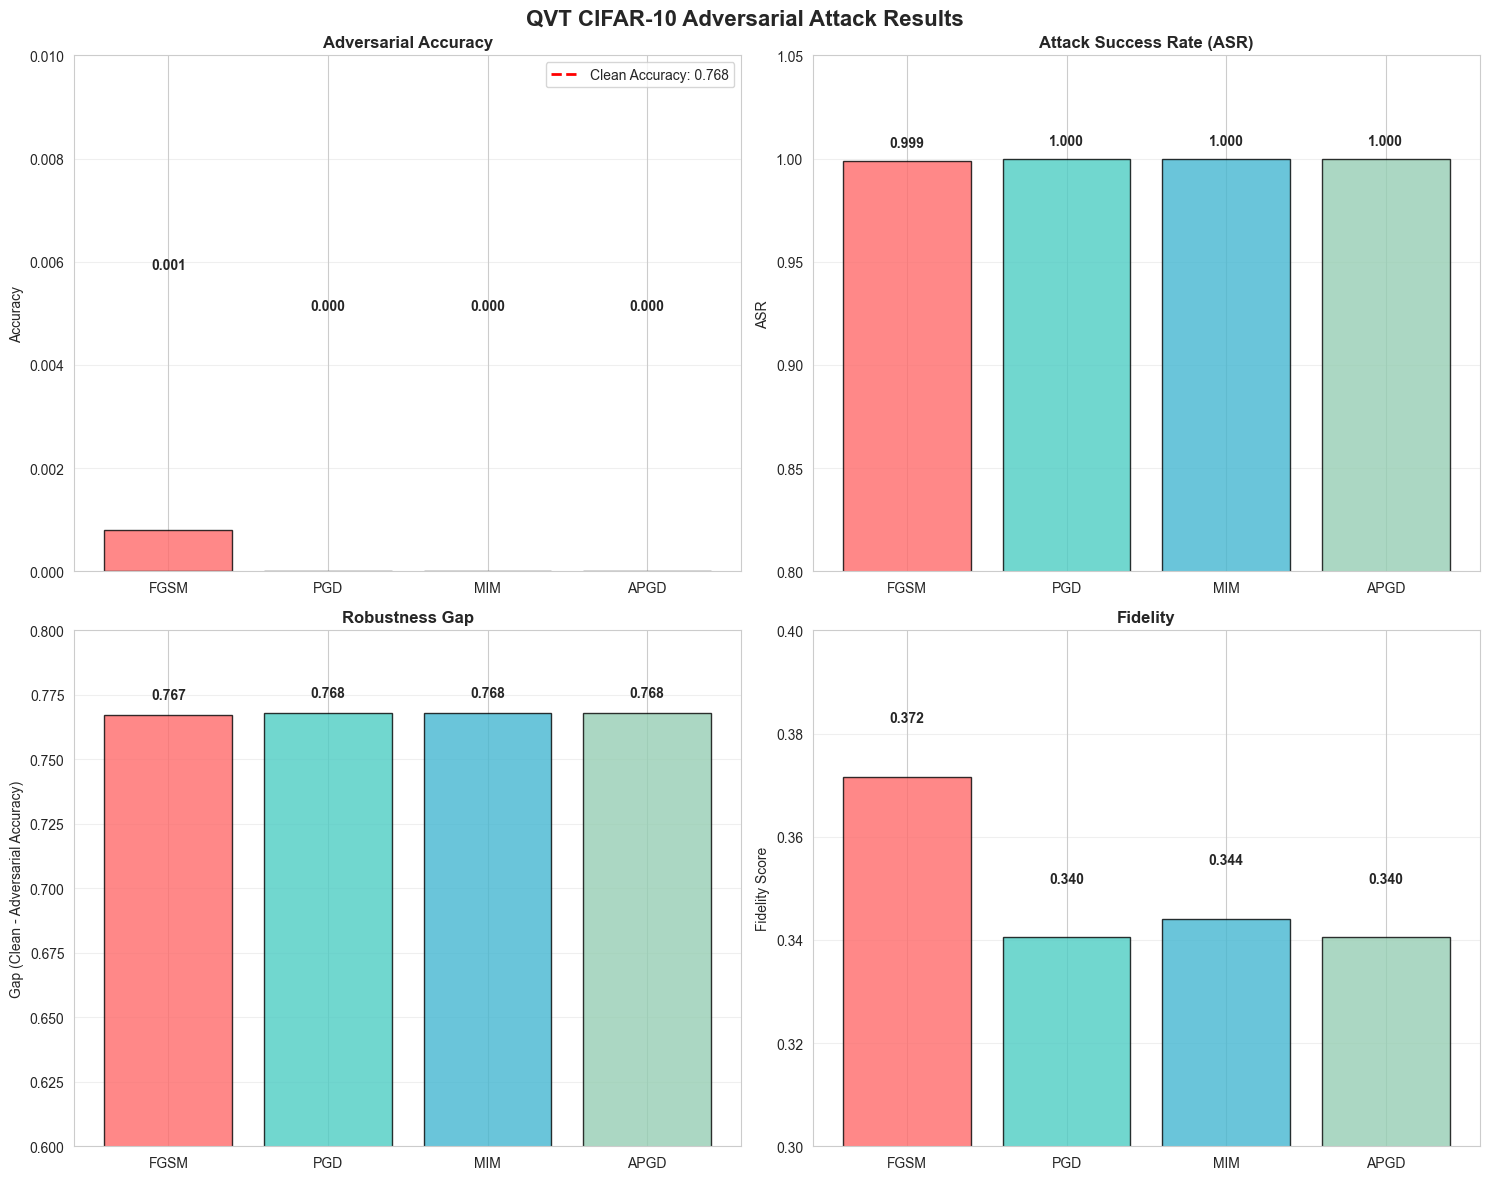

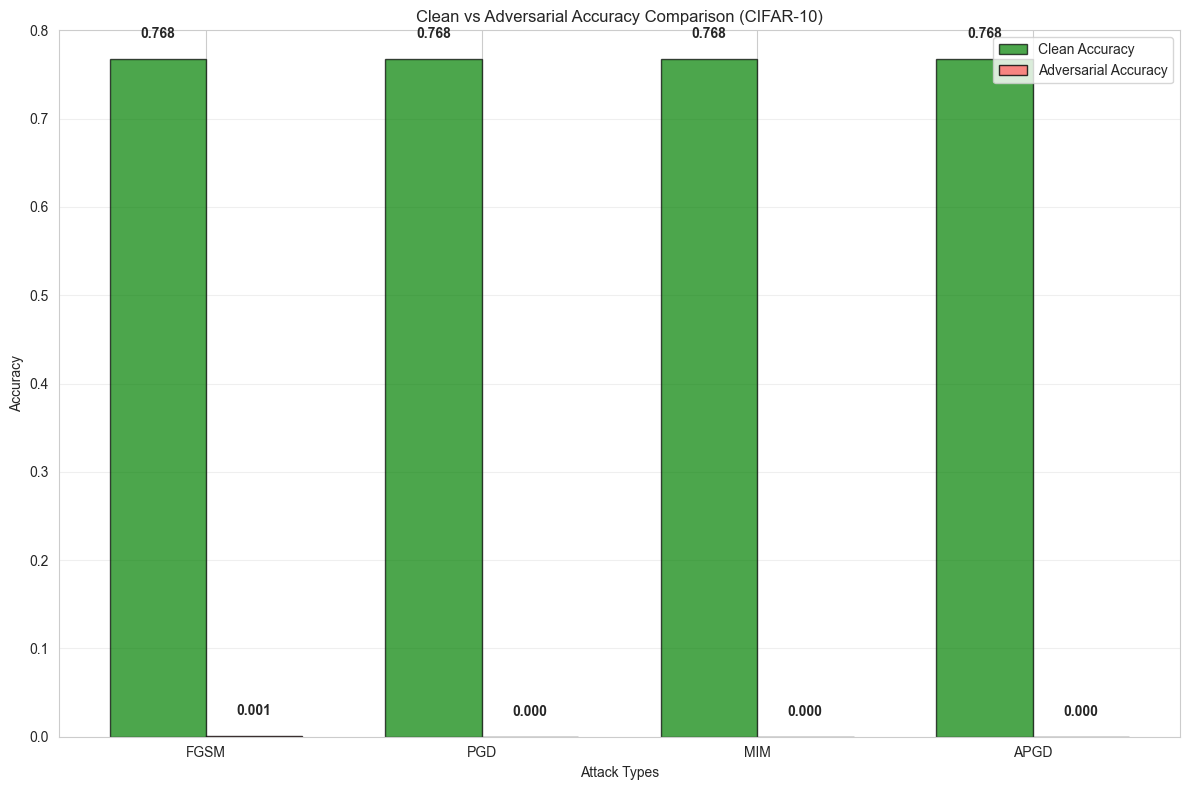

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('qvt_cifar_adversarial_results.csv')

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('QVT CIFAR-10 Adversarial Attack Results', fontsize=16, fontweight='bold')

# Define colors for each attack
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
attack_types = df['attack_type']

# 1. Adversarial Accuracy (much lower scale for CIFAR)
axes[0, 0].bar(attack_types, df['adv_accuracy'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Adversarial Accuracy', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 0.01)  # Adjusted for CIFAR's low adversarial accuracy
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['adv_accuracy']):
    axes[0, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Attack Success Rate (much higher for CIFAR)
axes[0, 1].bar(attack_types, df['asr'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Attack Success Rate (ASR)', fontweight='bold')
axes[0, 1].set_ylabel('ASR')
axes[0, 1].set_ylim(0.8, 1.05)  # Adjusted for CIFAR's high ASR
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['asr']):
    axes[0, 1].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Robustness Gap (much larger for CIFAR)
axes[1, 0].bar(attack_types, df['robustness_gap'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Robustness Gap', fontweight='bold')
axes[1, 0].set_ylabel('Gap (Clean - Adversarial Accuracy)')
axes[1, 0].set_ylim(0.6, 0.8)  # Adjusted for CIFAR's large robustness gap
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['robustness_gap']):
    axes[1, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Fidelity (much lower for CIFAR)
axes[1, 1].bar(attack_types, df['fidelity'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Fidelity', fontweight='bold')
axes[1, 1].set_ylabel('Fidelity Score')
axes[1, 1].set_ylim(0.3, 0.4)  # Adjusted for CIFAR's lower fidelity
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['fidelity']):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Add clean accuracy reference line to adversarial accuracy plot
clean_acc = df['clean_accuracy_on_set'].iloc[0]
axes[0, 0].axhline(y=clean_acc, color='red', linestyle='--', linewidth=2, 
                   label=f'Clean Accuracy: {clean_acc:.3f}')
axes[0, 0].legend()

plt.tight_layout()
plt.savefig('cifar_adversarial.png')
plt.show()

# Comparison chart showing Clean vs Adversarial Accuracy (with appropriate scale)
plt.figure(figsize=(12, 8))
x = np.arange(len(attack_types))
width = 0.35

plt.bar(x - width/2, [clean_acc] * len(attack_types), width, 
        label='Clean Accuracy', color='green', alpha=0.7, edgecolor='black')
plt.bar(x + width/2, df['adv_accuracy'], width, 
        label='Adversarial Accuracy', color=colors, alpha=0.8, edgecolor='black')

plt.xlabel('Attack Types')
plt.ylabel('Accuracy')
plt.title('Clean vs Adversarial Accuracy Comparison (CIFAR-10)')
plt.xticks(x, attack_types)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 0.8)  # Adjusted to show the dramatic difference

# Add value labels
for i, v in enumerate(df['adv_accuracy']):
    plt.text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
for i in range(len(attack_types)):
    plt.text(i - width/2, clean_acc + 0.02, f'{clean_acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('cifar_clean_vs_adversarial.png')
plt.show()


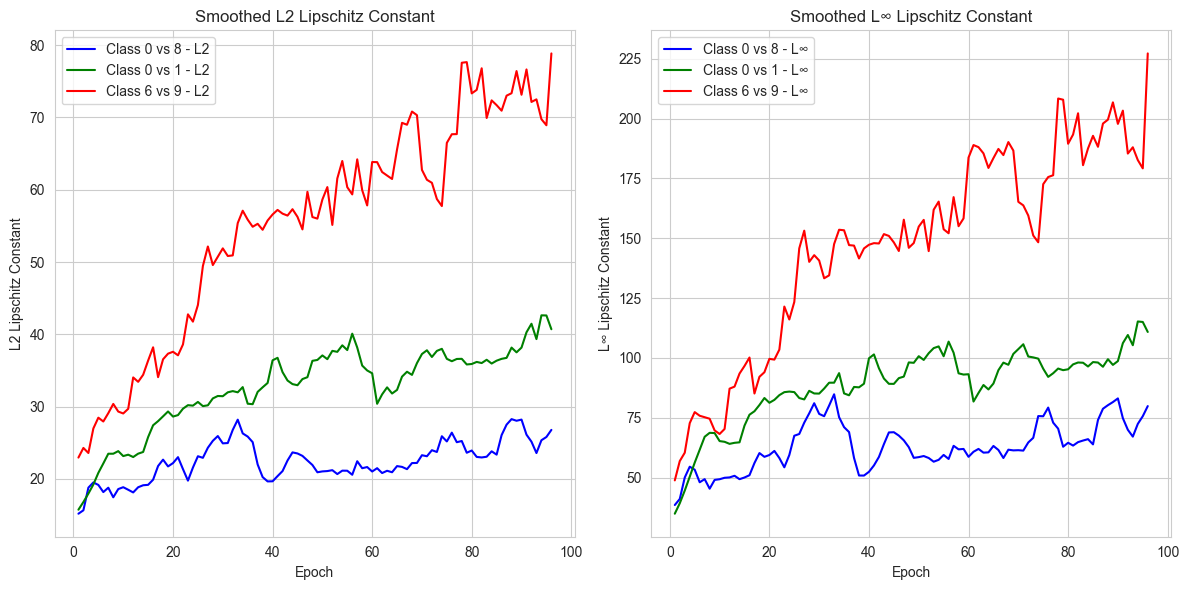

In [10]:
def smooth(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Load JSON files
with open("MNIST_binary_08_10000_rep1_lipschitz.json") as f:
    data_08 = json.load(f)

with open("MNIST_binary_01_10000_rep1_lipschitz.json") as f:
    data_01 = json.load(f)

with open("MNIST_binary_69_10000_rep1_lipschitz.json") as f:
    data_69 = json.load(f)

# Extract raw values
l2_08 = data_08["l2"]
inf_08 = data_08["inf"]
l2_01 = data_01["l2"]
inf_01 = data_01["inf"]
l2_69 = data_69["l2"]
inf_69 = data_69["inf"]

# Smooth the data
window = 5  # You can increase this for smoother curves
l2_08_smooth = smooth(l2_08, window)
inf_08_smooth = smooth(inf_08, window)
l2_01_smooth = smooth(l2_01, window)
inf_01_smooth = smooth(inf_01, window)
l2_69_smooth = smooth(l2_69, window)
inf_69_smooth = smooth(inf_69, window)

# New x-axis to match the reduced size after smoothing
epochs_smooth = list(range(1, len(l2_08_smooth) + 1))

# Plotting
plt.figure(figsize=(12, 6))

# L2 plot
plt.subplot(1, 2, 1)
plt.plot(epochs_smooth, l2_08_smooth, label="Class 0 vs 8 - L2", color="blue")
plt.plot(epochs_smooth, l2_01_smooth, label="Class 0 vs 1 - L2", color="green")
plt.plot(epochs_smooth, l2_69_smooth, label="Class 6 vs 9 - L2", color="red")

plt.title("Smoothed L2 Lipschitz Constant")
plt.xlabel("Epoch")
plt.ylabel("L2 Lipschitz Constant")
plt.legend()
plt.grid(True)

# L∞ plot
plt.subplot(1, 2, 2)
plt.plot(epochs_smooth, inf_08_smooth, label="Class 0 vs 8 - L∞", color="blue")
plt.plot(epochs_smooth, inf_01_smooth, label="Class 0 vs 1 - L∞", color="green")
plt.plot(epochs_smooth, inf_69_smooth, label="Class 6 vs 9 - L∞", color="red")
plt.title("Smoothed L∞ Lipschitz Constant")
plt.xlabel("Epoch")
plt.ylabel("L∞ Lipschitz Constant")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
